In [1]:
import numpy as np
import pandas as pd
import matplotlib
import os

In [2]:
# Found this partway through the analysis: https://sites.northwestern.edu/nusportsanalytics/2019/06/21/the-rise-of-triple-doubles-in-the-nba-examining-the-statistical-causes/
# Basically exactly what I want to do.

In [3]:
# Import high-level information
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog

In [4]:
# R to python reference
# https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07

In [5]:
# Define paths
wd = 'C:\\Users\\DTRManning\\Desktop\\IndependentProjects\\BasketballAnalytics'

In [6]:
# Get the first and last names of all active players.
nbaPlayers = players.get_players()
activePlayers = [player['full_name'] for player in nbaPlayers 
                    if player['is_active'] == True]

In [7]:
# Pings the nba_api for a player across one or more seasons.
#   - playerName (string): player's full name in the nba_api db.
class PlayerStats():
    def __init__( self, playerName ):
        self.playerName = playerName
        self.playerLogData = pd.DataFrame()
        self.seasons = list()

    # Get the game log for a certain player, based on their full name, across certain seasons.
    #   - seasons (list of integers): seasons to pull game log data on.
    #   - players (nba_api "players" endpoint)
    def GetPlayerGameLog( self, seasons, players ):
        playerDict = players.get_players()
        curPlayer = [player for player in playerDict if player['full_name'] == self.playerName]
        
        playerLog = list()
        for curSeason in seasons:
            # Ping API separately for each season and extract response dataframe.
            playerLog.append( playergamelog.PlayerGameLog( player_id = curPlayer[0]['id'], season = curSeason ).get_data_frames()[0] )
        
        # Combine all seasons.
        playerLog = pd.concat(playerLog)
        # Add player name.
        playerLog = playerLog.assign( Player_Name = curPlayer[0]['full_name']  )
        self.playerLogData = playerLog
        self.seasons = seasons


In [8]:
LukaDoncicStats = PlayerStats(playerName = 'Luka Doncic' )

In [9]:
LukaDoncicStats.playerName

'Luka Doncic'

In [10]:
LukaDoncicStats.GetPlayerGameLog(seasons=[2020],players=players)

In [11]:
LukaDoncicStats.seasons

[2020]

In [12]:
LukaDoncicStats.playerLogData

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Player_Name
0,22020,1629029,0022001071,"MAY 16, 2021",DAL @ MIN,L,21,6,13,0.462,...,6,6,2,0,4,1,18,-15,1,Luka Doncic
1,22020,1629029,0022001057,"MAY 14, 2021",DAL vs. TOR,W,34,7,19,0.368,...,10,11,0,1,1,4,20,-5,1,Luka Doncic
2,22020,1629029,0022000154,"MAY 12, 2021",DAL vs. NOP,W,31,12,24,0.500,...,8,8,0,0,4,1,33,24,1,Luka Doncic
3,22020,1629029,0022001037,"MAY 11, 2021",DAL @ MEM,L,26,4,16,0.250,...,5,5,0,0,5,1,12,-23,1,Luka Doncic
4,22020,1629029,0022001021,"MAY 09, 2021",DAL @ CLE,W,22,5,11,0.455,...,5,5,2,0,1,2,15,4,1,Luka Doncic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,22020,1629029,0022000071,"JAN 01, 2021",DAL vs. MIA,W,36,9,22,0.409,...,15,7,0,1,5,2,27,12,1,Luka Doncic
62,22020,1629029,0022000059,"DEC 30, 2020",DAL vs. CHA,L,24,4,10,0.400,...,2,5,2,0,3,3,12,-27,1,Luka Doncic
63,22020,1629029,0022000031,"DEC 27, 2020",DAL @ LAC,W,26,8,18,0.444,...,9,8,1,0,2,0,24,29,1,Luka Doncic
64,22020,1629029,0022000008,"DEC 25, 2020",DAL @ LAL,L,34,9,19,0.474,...,4,7,0,1,3,0,27,-14,1,Luka Doncic


In [13]:
# Theory is that players hunt for double doubles and triple doubles. Plot distribution of 
# rebounds when 10 points or more
# assists when 10 points or more
# assists when 10 points or more and 10 rebounds or more.
# rebounds when 10 points or more and 10 assists or more.
# - PlayerStatsData is a PlayerStats class object.
class PlotGameLogStats():
    def __init__( self, playerStatsData, playerName ):
        self.playerStatsData = playerStatsData
        self.playerName      = playerName

    # Plot rebounds when 10 points or more.
    def ReboundsWhen10Points( self ):
        curPlayerData = self.playerStatsData

        plotData = curPlayerData[curPlayerData['PTS'] >= 10]
        plotData = plotData[['REB']]
        
        # Plot
        plot = plotData.plot.hist(bins = list(range(1,20)))
        plot.set_xlabel('Rebounds')
        plot.set_title(self.playerName +': Rebounds when 10 points or more')
        plot.locator_params(integer=True)
        return(plot)

    # Plot assists when 10 points or more.
    def AssistsWhen10Points( self ):
        curPlayerData = self.playerStatsData
        
        plotData = curPlayerData[curPlayerData['PTS'] >= 10]
        plotData = plotData[['AST']]

        # Plot
        plot = plotData.plot.hist(bins = list(range(1,20)))
        plot.set_xlabel('Assists')
        plot.set_title(self.playerName + ': Assists when 10 points or more')
        plot.locator_params(integer=True)
        return(plot)

    # Plot rebounds when 10 points or more and 10 assists or more.
    def Rebounds10PointsAndAssists( self ):
        curPlayerData = self.playerStatsData

        plotData = curPlayerData[(curPlayerData['PTS'] >= 10) & (curPlayerData['AST'] >= 10) ]
        plotData = plotData[['REB']]

        # Plot
        plot = plotData.plot.hist(bins = list(range(1,20)))
        plot.set_xlabel('Rebounds')
        plot.set_title(self.playerName + ': Rebounds when 10 points or more and 10 assists or more')
        plot.locator_params(integer=True)
        return(plot)

    # Plot assists when 10 points or more and 10 rebounds or more.
    def Assists10PointsAndRebounds( self ):
        curPlayerData = self.playerStatsData

        plotData = curPlayerData[(curPlayerData['PTS'] >= 10) & (curPlayerData['REB'] >= 10) ]
        plotData = plotData[['AST']]

        # Plot
        plot = plotData.plot.hist(bins = list(range(1,20)))
        plot.set_xlabel('Assists')
        plot.set_title(self.playerName + ': Assists when 10 points or more and 10 rebounds or more')
        plot.locator_params(integer=True)
        return(plot)
        

In [14]:
PlotLukaStats = PlotGameLogStats( playerStatsData = LukaDoncicStats.playerLogData, playerName = LukaDoncicStats.playerName )

In [15]:
PlotLukaStats.ReboundsWhen10Points()

In [16]:
# Create probability distribution function for each player/stat combination to get likelihood that each value occurs.
# Use conditional probability. e.g., what are the chances, if you have 10 or more points, that you also have 10 or more assists.

In [17]:
class StatDistributions():
    def __init__( self, PlayerStatsClass ):
        self.PlayerStatsClass = PlayerStatsClass
        self.Distributions = dict()
        self.playerName = PlayerStatsClass.playerName
        self.StatFilters = StatFilters = np.array([
                                {'selectVar': ['AST'], 'filterVars': ['PTS']},
                                {'selectVar': ['AST'], 'filterVars': ['PTS','REB']},
                                {'selectVar': ['REB'], 'filterVars': ['PTS']},
                                {'selectVar': ['REB'], 'filterVars': ['PTS','AST']}
])
    
    def IterOverStats( self ):
        curPlayerStatClass = self.PlayerStatsClass
        
        AllPlayerDistributions= dict()

        for i in range(0, len(self.StatFilters)):

            CurFilter = self.StatFilters[i]
            
            curDistribution = self.CalcDistribution( curPlayerStatClass, CurFilter )
            AllPlayerDistributions = { **AllPlayerDistributions, **curDistribution }
            
        self.Distributions = AllPlayerDistributions
        return(0)
    
    def CalcDistribution( self, curPlayerStatClass, CurFilter ):
        
        # Flatten list with variables for needed for analysis.
        allStats = [CurFilter['selectVar'], CurFilter['filterVars']]
        allStats = allStats[0] + allStats[1]
    
        curPlayerData = curPlayerStatClass.playerLogData
        curPlayerData = curPlayerData[allStats] # Keep only required columns for memory management.

        # Filter down to entries of 10 or more for both of the filter variables.
        for var in CurFilter['filterVars']:
            curPlayerData = curPlayerData[curPlayerData[var] >= 10]

        statDistribution = curPlayerData[CurFilter['selectVar'][0]].value_counts(normalize = True) # Calculate relative frequency.
        statDistribution = statDistribution.sort_index()

        curStatName = CurFilter['selectVar'][0] + '_' + 'when' + '_' +'_'.join(CurFilter['filterVars']) + '_gt_9'
        
        statDistribution = pd.DataFrame( {'PlayerName': curPlayerStatClass.playerName, curStatName: statDistribution} )

        # Return results in a dictionary.
        d = dict()
        d[curStatName] = statDistribution

        return( d )

In [18]:
### Gather two datasets ###
# Stats for all current active players
# Distributions for all current active players 

In [19]:
#activePlayers = activePlayers[0:3]

In [20]:
# Gets game log data for points, assists, and rebounds for each player. 
# Gets distribution of stats for each player.
def GatherPlayerStats( activePlayers, pullSeasons = [2020]):

    allPlayerData = list()
    allPlayerDist = list()

    # Only select needed columns.
    selectCols = ['SEASON_ID','PTS','REB','AST','Player_Name','MIN']
    # Remove games with small number of minutes player. Per game threshold in minutes.
    minuteThreshold = 5

    #for curPlayerName in activePlayers:
    for curPlayerName in activePlayers:
        print(curPlayerName)

        # Pull player data from API
        CurPlayerStats = PlayerStats( playerName = curPlayerName )
        CurPlayerStats.GetPlayerGameLog(seasons=pullSeasons,players=players)

        # Trim data down to specific variables of interest.
        CurPlayerStats.playerLogData = CurPlayerStats.playerLogData[selectCols]
        CurPlayerStats.playerLogData = CurPlayerStats.playerLogData[CurPlayerStats.playerLogData['MIN'] >= minuteThreshold]
        
        # Get player-specific stat distributions.
        curPlayerDist = StatDistributions(CurPlayerStats)
        curPlayerDist.IterOverStats()
        
        # Combine player data and stat distributions.
        allPlayerDist.append(curPlayerDist.Distributions)
        
        allPlayerData.append(CurPlayerStats.playerLogData)
        
    allPlayerDataDF = pd.concat(allPlayerData)
        
    return( {'playerData': allPlayerDataDF, 'playerStatDist': allPlayerDist} )

In [21]:
AllPlayerData = GatherPlayerStats( activePlayers )

Steven Adams
Bam Adebayo
LaMarcus Aldridge
Kyle Alexander
Nickeil Alexander-Walker
Grayson Allen
Jarrett Allen
Kadeem Allen
Al-Farouq Aminu
Justin Anderson
Kyle Anderson
Ryan Anderson
Giannis Antetokounmpo
Kostas Antetokounmpo
Thanasis Antetokounmpo
Carmelo Anthony
OG Anunoby
Ryan Arcidiacono
Trevor Ariza
D.J. Augustin
Deandre Ayton
Dwayne Bacon
Marvin Bagley III
Lonzo Ball
Mo Bamba
J.J. Barea
Harrison Barnes
RJ Barrett
Will Barton
Keita Bates-Diop
Nicolas Batum
Aron Baynes
Kent Bazemore
Darius Bazley
Bradley Beal
Malik Beasley
Marco Belinelli
Jordan Bell
DeAndre' Bembry
Dragan Bender
Davis Bertans
Patrick Beverley
Khem Birch
Goga Bitadze
Bismack Biyombo
Nemanja Bjelica
Eric Bledsoe
Bogdan Bogdanovic
Bojan Bogdanovic
Bol Bol
Jonah Bolden
Jordan Bone
Isaac Bonga
Devin Booker
Chris Boucher
Brian Bowen II
Ky Bowman
Avery Bradley
Tony Bradley
Jarrell Brantley
Ignas Brazdeikis
Mikal Bridges
Miles Bridges
Oshae Brissett
Ryan Broekhoff
Malcolm Brogdon
Dillon Brooks
Bruce Brown
Jaylen Brown
Mo

In [22]:
AllPlayerLogData = AllPlayerData['playerData']

In [23]:
AllPlayerLogData

,SEASON_ID,PTS,REB,AST,Player_Name,MIN
0,22020,1,8,2,Steven Adams,24
1,22020,2,1,2,Steven Adams,13
2,22020,4,10,1,Steven Adams,32
3,22020,12,9,0,Steven Adams,16
4,22020,7,5,1,Steven Adams,29
...,...,...,...,...,...,...
67,22020,7,2,2,Ivica Zubac,15
68,22020,12,4,1,Ivica Zubac,19
69,22020,10,2,0,Ivica Zubac,16
70,22020,12,0,0,Ivica Zubac,19


In [33]:
### Plot distribution of all player-games, as well as filtering to potential triple double games.

class PlotAllPlayerStats():
    def __init__( self, AllPlayerLogData ):
        self.AllPlayerLogData = AllPlayerLogData
        self.ptsDistribution = pd.DataFrame()
        self.rebDistribution = pd.DataFrame()
        self.astDistribution = pd.DataFrame()
        self.rebTripDoubDist = pd.DataFrame()
        self.astDistribution = pd.DataFrame()
            

    def AllPlayerPlotData(self):

        ### Distribution of all player-games
        # Points distribution
        self.ptsDistribution = AllPlayerLogData['PTS'].value_counts(normalize = True)
        self.ptsDistribution = self.ptsDistribution.sort_index()
        # Rebounds distribution
        self.rebDistribution = AllPlayerLogData['REB'].value_counts(normalize = True)
        self.rebDistribution = self.rebDistribution.sort_index()
        # Assists distribution
        self.astDistribution = AllPlayerLogData['AST'].value_counts(normalize = True)
        self.astDistribution = self.astDistribution.sort_index()

        ### Distribution of potential triple-double games
        self.rebTripDoubDist = AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['REB'] > 9) ]
        self.rebTripDoubDist = self.rebTripDoubDist.sort_index()
        self.astTripDoubDist = AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['AST'] > 9) ]
        self.rebTripDoubDist = self.rebTripDoubDist.sort_index()
        
#    def PlotAllPlayerStats()

In [32]:
AllPlayerStats.ptsDistribution

0     0.060274
1     0.006204
2     0.059044
3     0.046262
4     0.046743
5     0.048508
6     0.060541
7     0.042946
8     0.056102
9     0.047652
10    0.046850
11    0.044925
12    0.040646
13    0.037598
14    0.034335
15    0.033105
16    0.029522
17    0.029736
18    0.026794
19    0.021821
20    0.022355
21    0.018237
22    0.017702
23    0.015777
24    0.014600
25    0.013210
26    0.010696
27    0.010001
28    0.009145
29    0.007434
30    0.006792
31    0.005027
32    0.004813
33    0.004439
34    0.003209
35    0.002567
36    0.002941
37    0.002300
38    0.001979
39    0.000909
40    0.000856
41    0.000695
42    0.001391
43    0.000749
44    0.000749
45    0.000267
46    0.000267
47    0.000321
48    0.000053
49    0.000160
50    0.000374
53    0.000107
54    0.000053
57    0.000053
60    0.000107
62    0.000053
Name: PTS, dtype: float64

In [81]:
ptsDistribution

0     0.060274
1     0.006204
2     0.059044
3     0.046262
4     0.046743
5     0.048508
6     0.060541
7     0.042946
8     0.056102
9     0.047652
10    0.046850
11    0.044925
12    0.040646
13    0.037598
14    0.034335
15    0.033105
16    0.029522
17    0.029736
18    0.026794
19    0.021821
20    0.022355
21    0.018237
22    0.017702
23    0.015777
24    0.014600
25    0.013210
26    0.010696
27    0.010001
28    0.009145
29    0.007434
30    0.006792
31    0.005027
32    0.004813
33    0.004439
34    0.003209
35    0.002567
36    0.002941
37    0.002300
38    0.001979
39    0.000909
40    0.000856
41    0.000695
42    0.001391
43    0.000749
44    0.000749
45    0.000267
46    0.000267
47    0.000321
48    0.000053
49    0.000160
50    0.000374
53    0.000107
54    0.000053
57    0.000053
60    0.000107
62    0.000053
Name: PTS, dtype: float64

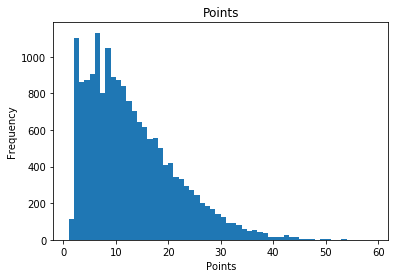

In [82]:
# Points
plot = AllPlayerLogData['PTS'].plot.hist(bins = list(range(1,62)))
plot.set_xlabel('Points')
plot.set_title('Points')
plot.locator_params(integer=True)

In [84]:
rebDistribution

0     0.060167
1     0.112953
2     0.137822
3     0.139694
4     0.123329
5     0.107819
6     0.082148
7     0.062734
8     0.046636
9     0.032142
10    0.027276
11    0.020483
12    0.012996
13    0.009306
14    0.007755
15    0.006150
16    0.003744
17    0.002300
18    0.001711
19    0.001070
20    0.000481
21    0.000481
22    0.000321
23    0.000214
24    0.000107
26    0.000053
28    0.000053
30    0.000053
Name: REB, dtype: float64

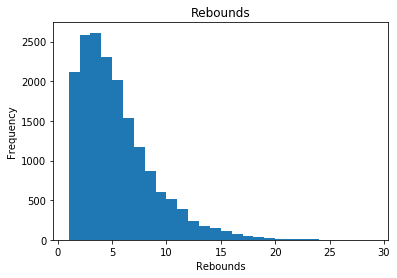

In [86]:
# Rebounds
plot = AllPlayerLogData['REB'].plot.hist(bins = list(range(1,30)))
plot.set_xlabel('Rebounds')
plot.set_title('Rebounds')
plot.locator_params(integer=True)

In [85]:
astDistribution

0     0.213071
1     0.229383
2     0.171034
3     0.119104
4     0.083645
5     0.055728
6     0.038667
7     0.028880
8     0.019521
9     0.012996
10    0.010055
11    0.006685
12    0.004118
13    0.002300
14    0.001711
15    0.001551
16    0.000481
17    0.000535
18    0.000053
19    0.000267
20    0.000053
21    0.000107
24    0.000053
Name: AST, dtype: float64

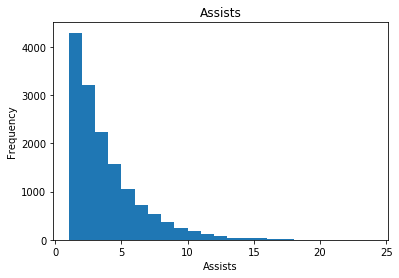

In [87]:
# Assists
plot = AllPlayerLogData['AST'].plot.hist(bins = list(range(1,25)))
plot.set_xlabel('Assists')
plot.set_title('Assists')
plot.locator_params(integer=True)

In [31]:
plot = ptsDistribution.plot.hist(bins = list(range(1,65)))

In [32]:
print(matplotlib.rcParams['backend'])

module://ipykernel.pylab.backend_inline


In [99]:
AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['REB'] > 9) ]

,SEASON_ID,PTS,REB,AST,Player_Name,MIN
5,22020,10,14,3,Steven Adams,36
7,22020,10,10,3,Steven Adams,31
13,22020,12,11,3,Steven Adams,22
23,22020,10,17,2,Steven Adams,21
24,22020,13,12,0,Steven Adams,29
...,...,...,...,...,...,...
47,22020,12,14,1,Ivica Zubac,27
49,22020,10,16,1,Ivica Zubac,28
54,22020,13,10,1,Ivica Zubac,18
55,22020,10,11,1,Ivica Zubac,24


In [ ]:
AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['REB'] > 9) ]

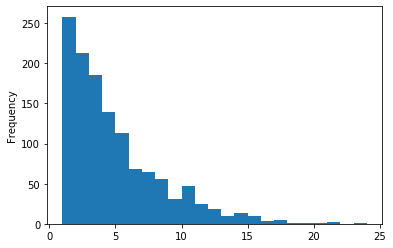

In [94]:
# Assists when player has ten or more points and ten or more rebounds.
plot = AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['REB'] > 9) ]['AST']\
        .plot.hist(bins = list(range(1,25)))

In [96]:
# Relative likelihood of assists.
AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['REB'] > 9) ]['AST']\
        .value_counts(normalize = True)\
        .sort_index()

0     0.116992
1     0.179666
2     0.148329
3     0.129526
4     0.096797
5     0.078691
6     0.047354
7     0.045265
8     0.038997
9     0.021588
10    0.032730
11    0.017409
12    0.013231
13    0.006964
14    0.009749
15    0.006964
16    0.002089
17    0.003482
18    0.000696
19    0.000696
20    0.000696
21    0.001393
24    0.000696
Name: AST, dtype: float64

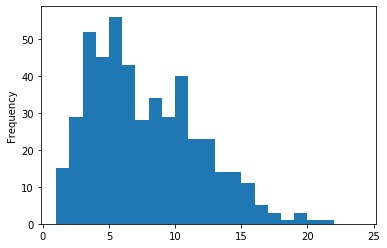

In [97]:
# Rebounds when player has ten or more points and ten or more assists.
plot = AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['AST'] > 9) ]['REB']\
        .plot.hist(bins = list(range(1,25)))

In [98]:
# Relative likelihood of rebounds.
AllPlayerLogData[(AllPlayerLogData['PTS'] > 9) & (AllPlayerLogData['AST'] > 9) ]['REB']\
        .value_counts(normalize = True)\
        .sort_index()

0     0.010526
1     0.031579
2     0.061053
3     0.109474
4     0.094737
5     0.117895
6     0.090526
7     0.058947
8     0.071579
9     0.061053
10    0.084211
11    0.048421
12    0.048421
13    0.029474
14    0.029474
15    0.023158
16    0.010526
17    0.006316
18    0.002105
19    0.006316
20    0.002105
21    0.002105
Name: REB, dtype: float64

In [ ]:
### Detect players that stat hunt